In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r"E:\Data_mites_projects\teaching assi\PRCP-1026-TeachingAssistance\Teaching Assistance\tae.csv")
df.head(5)

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [5]:
df = pd.DataFrame(df)

# Define the new header row as a DataFrame with the same columns
new_header = pd.DataFrame(['English_speaker', 'Course_instructor', 'Course', 'Summer_or_regular_semester', 'Class_size', 'Class_attribute'],
                          columns=df.columns)

# Concatenate the new header row at the top of the existing DataFrame
df = pd.concat([new_header, df], ignore_index=True)

# Display the modified DataFrame
print(df)

ValueError: 3 columns passed, passed data had 6 columns

In [ ]:
# Create a new DataFrame with the header row
header_df = pd.DataFrame(['English_speaker', 'Course_instructor', 'Course', 'Summer_or_regular_semester', 'Class_size', 'Class_attribute'])

# Concatenate the header DataFrame with the original DataFrame
df = pd.concat([header_df, df], ignore_index=False)

# Save the modified DataFrame
#df.to_csv(r"E:\Data_mites_projects\teaching assi\PRCP-1026-TeachingAssistance\Teaching Assistance\tae.csv", index=False)


df.head(5)

,0,1,23,3,1.1,19,3.1
0,English_speaker,NaN,NaN,NaN,NaN,NaN,NaN
1,Course_instructor,NaN,NaN,NaN,NaN,NaN,NaN
2,Course,NaN,NaN,NaN,NaN,NaN,NaN
3,Summer_or_regular_semester,NaN,NaN,NaN,NaN,NaN,NaN
4,Class_size,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data=df

In [7]:
data.shape

(150, 6)

In [11]:
data.head(5)

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [13]:
for column in data.columns:                                 
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column '1': [2 1]
Unique values in column '23': [15 23  5  7  9 10 22 13 18  6 25  2  1  8 14 21 11 16  4 17 20 12 24  3
 19]
Unique values in column '3': [ 3  2 11  5 22  1 21 17 25  7  9 15 13  8 16 19 14  6 12 18 23 26 24 20
  4 10]
Unique values in column '1.1': [1 2]
Unique values in column '19': [17 49 33 55 20 19 27 58  9 30 29 39 42 43 10 46 23 31 22 37 13 24 38 28
 51 36 21 48 25 11 45 18 14 35 15 32 34 66 12  3  7 54 16 44  5 26]
Unique values in column '3.1': [3 2 1]


In [14]:
column = data.columns 
for i in column:
    print(data.dtypes[i])

int64
int64
int64
int64
int64
int64


In [15]:
for column in data.columns:
    missing_count = data[column].isnull().sum()
    print(f"{column} = {missing_count}")

1 = 0
23 = 0
3 = 0
1.1 = 0
19 = 0
3.1 = 0


In [8]:
data.describe

<bound method NDFrame.describe of      1  23   3  1.1  19  3.1
0    2  15   3    1  17    3
1    1  23   3    2  49    3
2    1   5   2    2  33    3
3    2   7  11    2  55    3
4    2  23   3    1  20    3
..  ..  ..  ..  ...  ..  ...
145  2   3   2    2  26    1
146  2  10   3    2  12    1
147  1  18   7    2  48    1
148  2  22   1    2  51    1
149  2   2  10    2  27    1

[150 rows x 6 columns]>

In [20]:
for column in data.select_dtypes(include=np.number):  # Select numerical columns
  skewness=stats.skew(data[column])
  kurtosis= stats.kurtosis(data[column])
  print(f'{column}=   skew = {skewness}\n kutosis = {kurtosis}')

1=   skew = -1.6083068904485138
 kutosis = 0.5866510538641658
23=   skew = 0.0017262272691813717
 kutosis = -1.145524888974843
3=   skew = 0.8512392369048062
 kutosis = -0.5417973381067189
1.1=   skew = -1.9975126578276838
 kutosis = 1.9900568181818166
19=   skew = 0.48245861478461965
 kutosis = -0.38678834900915815
3.1=   skew = -0.02449598587206156
 kutosis = -1.4991998933333412


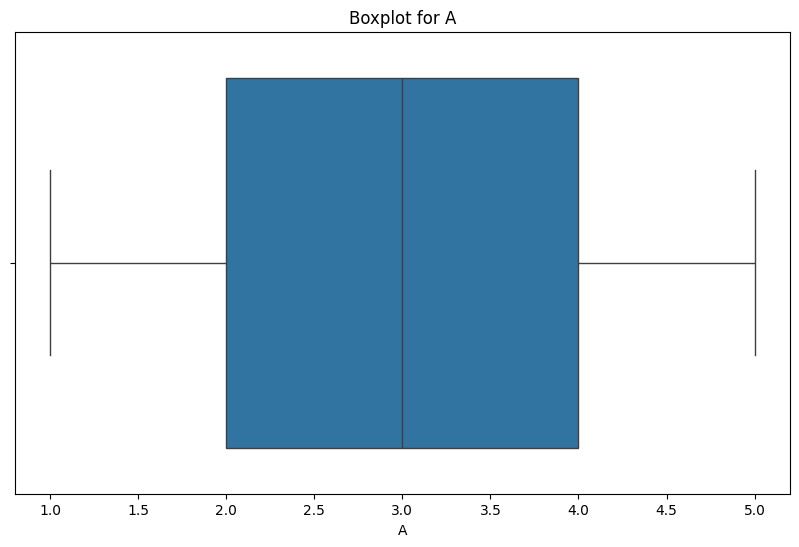

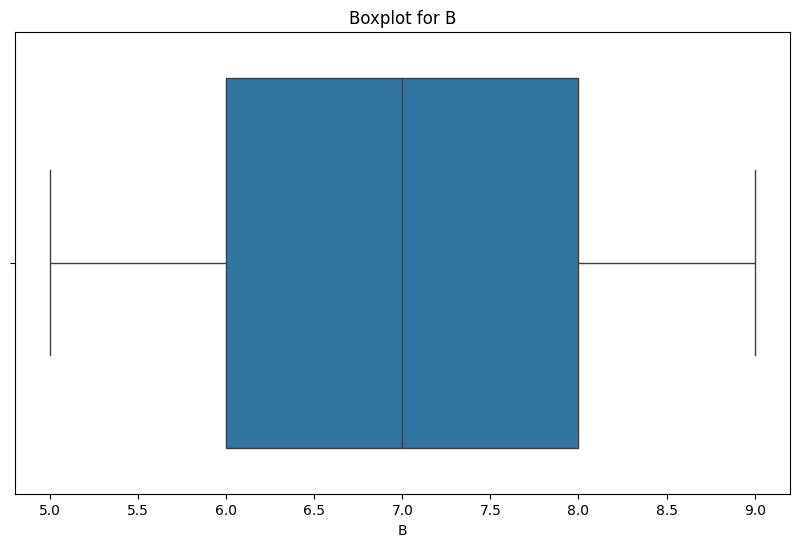

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()


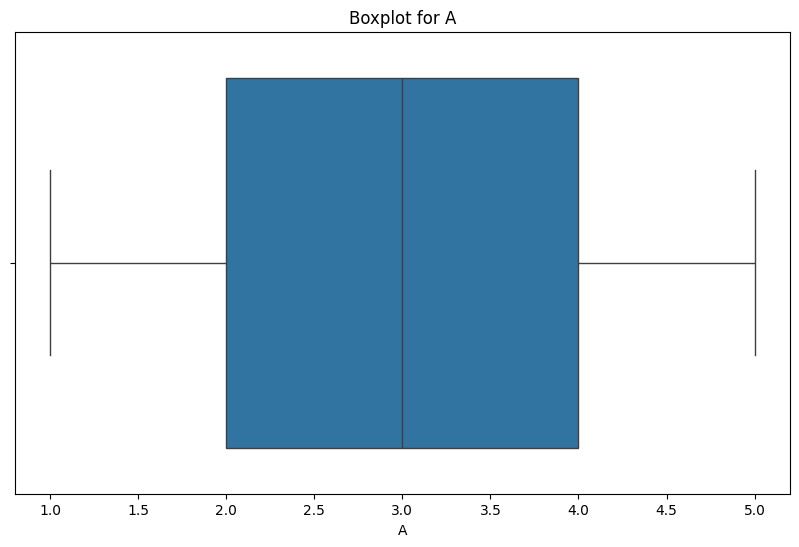

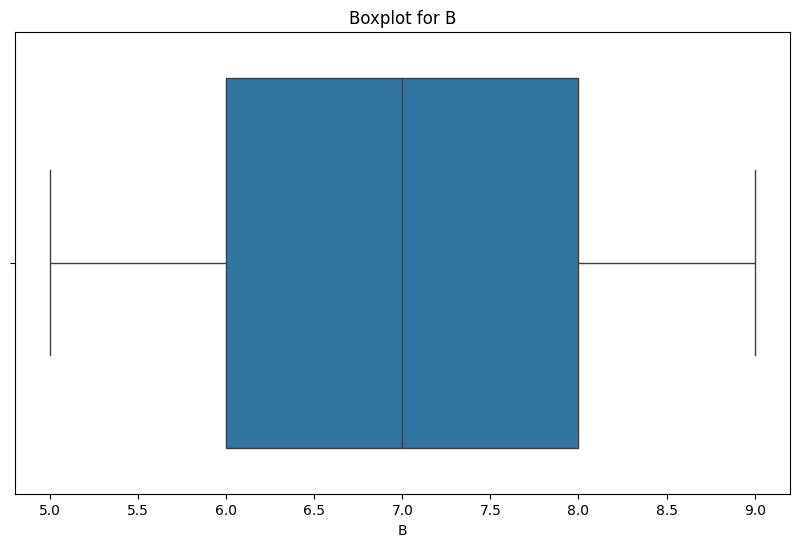

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Filter out columns with few unique values (likely categorical)
continuous_columns = [col for col in numeric_columns if data[col].nunique() > 1]

for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()


In [41]:
def detect_outliers_iqr(data):
    # Select only numeric columns to calculate IQR
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier detection thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()
    return outliers
# Check for outliers in the Box-Cox transformed data
outliers_boxcox = detect_outliers_iqr(data)
print("Outliers using Box-Cox transformation:")
print(outliers_boxcox)

Outliers after Box-Cox transformation:
A    0
B    0
dtype: int64


In [46]:
print(data.columns)
print(data.head(5))

Index(['A', 'B'], dtype='object')
   A  B
0  1  5
1  2  6
2  3  7
3  4  8
4  5  9


In [42]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['3.1'])  # Features
y = data['3.1']  # Target (low, medium, high)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['3.1'] not found in axis"